# SALES PREDICTION THROUGH ADVERTISING MODES USING REGRESSION

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [81]:
df = pd.read_csv("advertising.csv")

## The sales are in thousands of units and the budget is in thousands of dollars.

In [82]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Target Variable: Sales
Features: TV, Radio, Newspaper

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


No missing values

In [84]:
#check for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

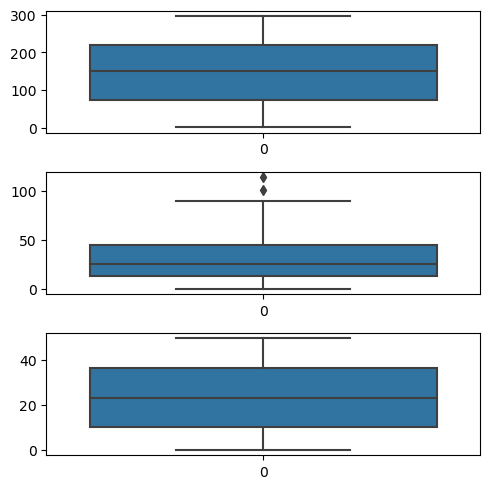

In [85]:
#outlier analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

In [86]:
#Check outlier with quantile

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

inner = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

inner.sum()

TV           144.45
Radio         26.55
Newspaper     32.35
Sales          8.05
dtype: float64


TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64

only 2 outliers in newspaper

/var/folders/_w/gvcw0whd2qv2_s61kzgp10v40000gn/T/ipykernel_77797/1871714005.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(df['TV'], ax = axs[0])
/var/folders/_w/gvcw0whd2qv2_s61kzgp10v40000gn/T/ipykernel_77797/1871714005.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(df[

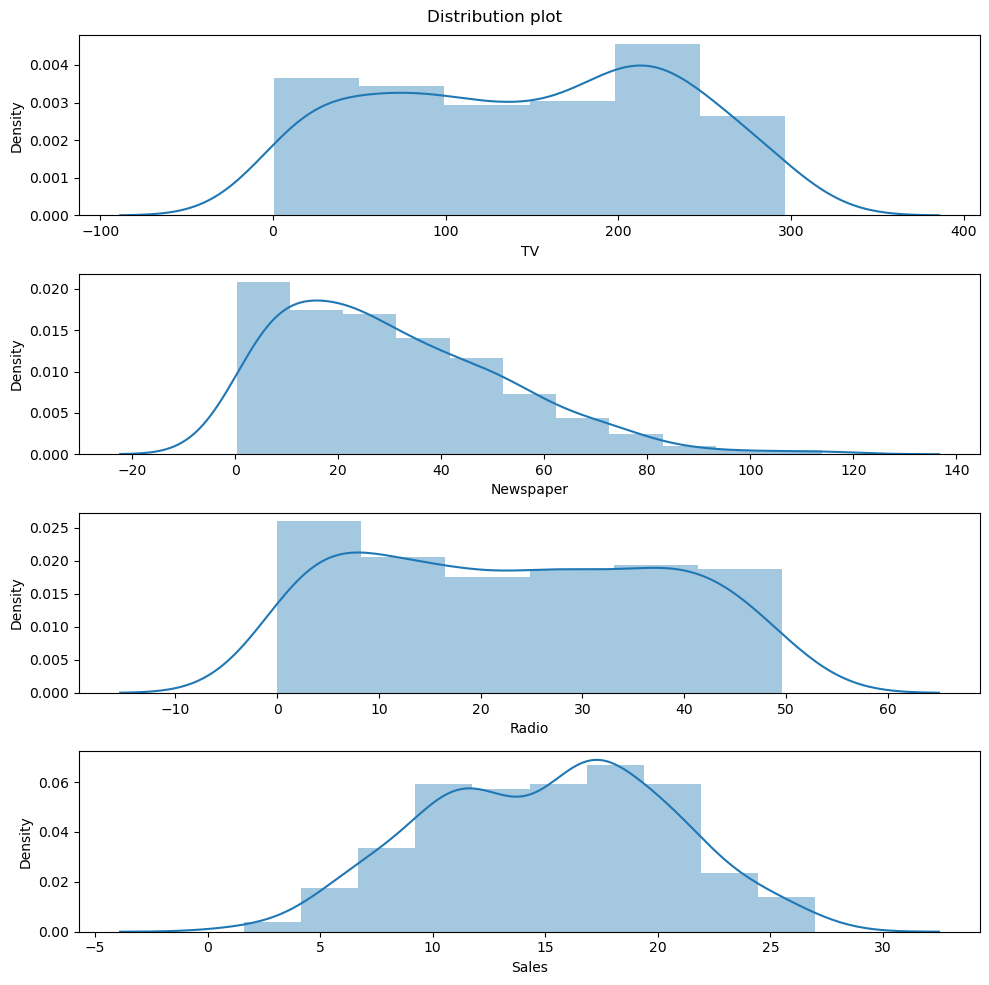

In [87]:
#Distribution plot

fig, axs = plt.subplots(4, figsize = (10,10))
plt.suptitle('Distribution plot')

plt1 = sns.distplot(df['TV'], ax = axs[0])
plt2 = sns.distplot(df['Newspaper'], ax = axs[1])
plt3 = sns.distplot(df['Radio'], ax = axs[2])
plt4 = sns.distplot(df['Sales'], ax = axs[3])
plt.tight_layout()


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


<Axes: >

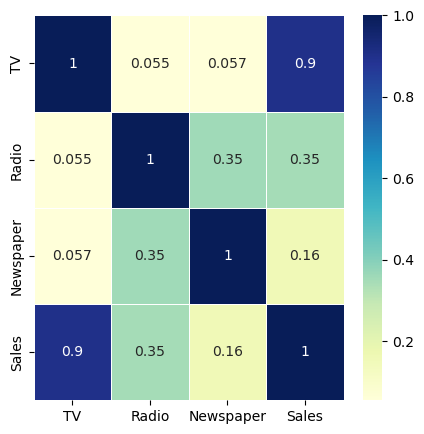

In [88]:
#check for correlation
print(df.corr()) #df.corr()

#correlation matrix
corr_mat = df.corr()
fig, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(corr_mat, ax = ax, cmap = 'YlGnBu', linewidths = 0.5, annot = True)

### TV and Sales are strongly correlated

/Users/vinaysubramanyam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


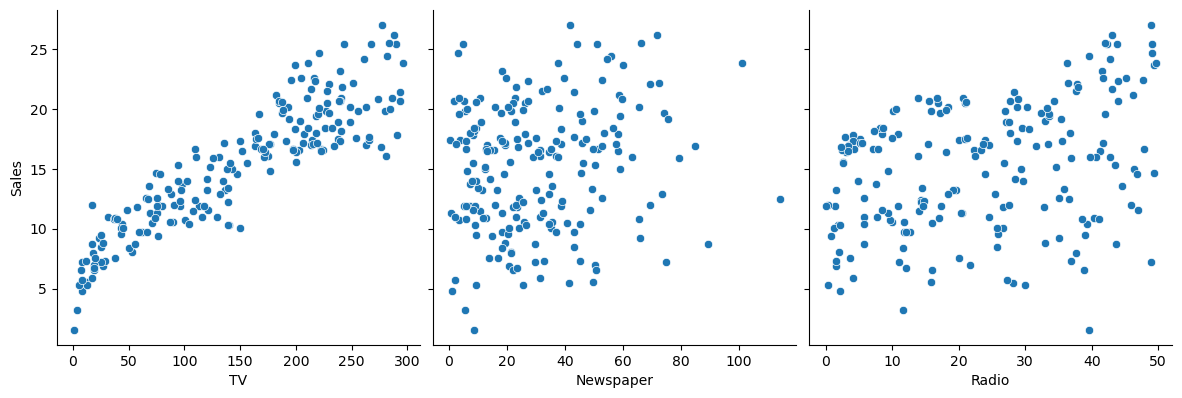

In [22]:
#how sales related to features
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

TV and Sales are strongly linearly correlated.
Newspaper and Sales are not so strongly linearly correlated.

Lets consider TV and Sales as independent and dependent variable

# Model Building

Linear Regression

Equation for simple linear regression is y = b0 + b1*x
y = dependent variable
b0 = intercept
b1 = slope
x = independent variable

Sales = b0 + b1*TV

Types of Regression Models 

1. Simple Linear Regression
2. Polynomial Regression
3. Multiple Linear Regression



# Simple linear regression

In [89]:
X = df[['TV']]
y = df['Sales']

In [30]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [91]:
#build simple linear regression model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [92]:
print(reg.intercept_)
print(reg.coef_)

#y = 6.948 + 0.054 * x

6.948683200001362
[0.05454575]


In [93]:
print(reg.score(X_train, y_train))

0.8157933136480388


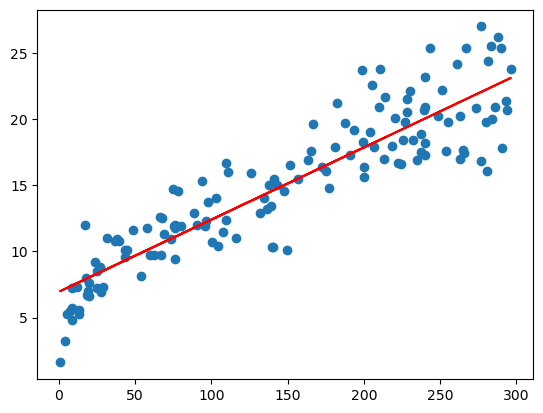

In [94]:
#scatter plot
y_pred = reg.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, 'r')
plt.show()

### Model Evaluation

Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

/var/folders/_w/gvcw0whd2qv2_s61kzgp10v40000gn/T/ipykernel_77797/257081432.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_pred)


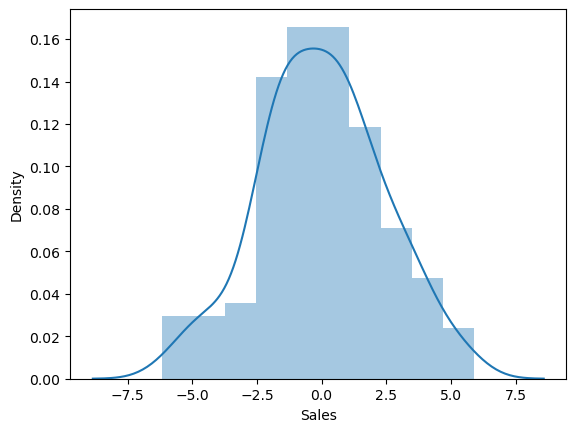

In [39]:
#distrubution of error
sns.distplot(y_train - y_pred)
plt.show()

The residuals are following the normally distributed with a mean 0.

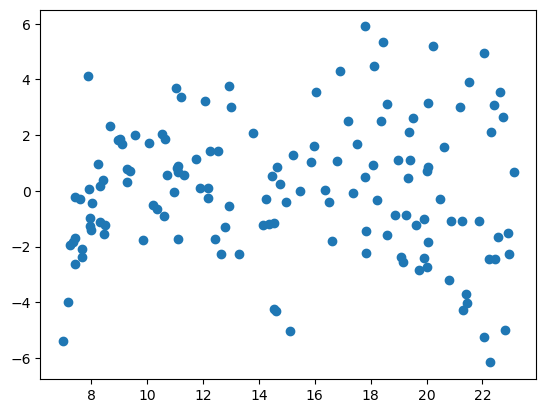

In [95]:
#check for residual values

plt.scatter(y_pred, y_train - y_pred)
plt.show()

The residual is normally distributed. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

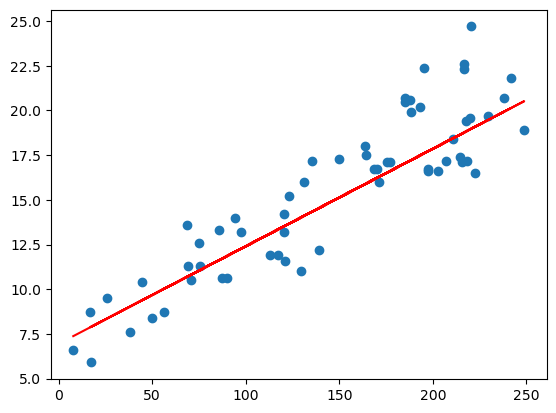

In [96]:
#test data
y_test_pred = reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [97]:
#MSE, MAE, RMSE, R2

print("Mean squared error =", metrics.mean_squared_error(y_test, y_test_pred))
print("Mean absolute error =", metrics.mean_absolute_error(y_test, y_test_pred))
print("Root mean squared error =", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("R2 score =", metrics.r2_score(y_test, y_test_pred))

Mean squared error = 4.07755637182695
Mean absolute error = 1.6480589869746525
Root mean squared error = 2.0192960089662315
R2 score = 0.792103160124566


# Polynomial Regression

In [117]:
X = df[['TV']]
y = df['Sales']

In [118]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [119]:
#polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [120]:
#polynomial regression
pr = linear_model.LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression()

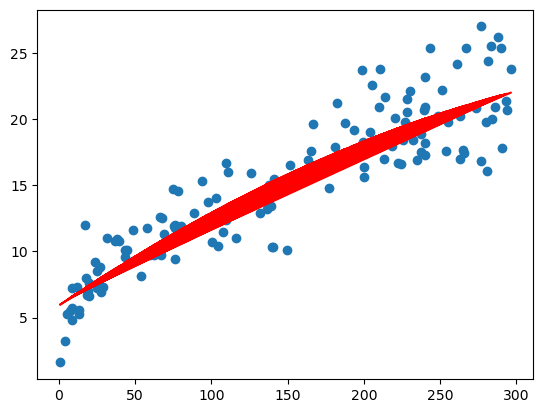

In [121]:
#scatter plot
y_pred = pr.predict(X_train_poly)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, 'r')
plt.show()

In [122]:
print("Intercept =", pr.intercept_)
print("Coefficients =", pr.coef_)
print("R2 score =", pr.score(X_train_poly, y_train))

#y = 6.948 + 0.054 * x

Intercept = 5.915323485810861
Coefficients = [ 0.00000000e+00  7.80188301e-02 -8.01114691e-05]
R2 score = 0.8252195402648226


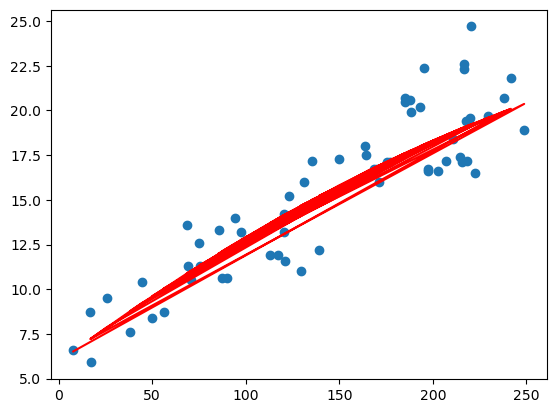

In [124]:
#test data
y_test_pred = pr.predict(X_test_poly)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [125]:
#MSE, MAE, RMSE, R2

print("Mean squared error =", metrics.mean_squared_error(y_test, y_test_pred))
print("Mean absolute error =", metrics.mean_absolute_error(y_test, y_test_pred))
print("Root mean squared error =", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("R2 score =", metrics.r2_score(y_test, y_test_pred))

Mean squared error = 3.72310266655606
Mean absolute error = 1.5652088495893501
Root mean squared error = 1.9295343133917209
R2 score = 0.8101752107569256


# Multi linear regression

## From the correlation matrix, we can there is no multicollinearity. 

In [98]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [99]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [100]:
#multivariate regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [102]:
print(reg.intercept_)
print(reg.coef_)

#y = 4.334595861728436 + 0.05382911 * x1 + 0.11001224 * x2 + 0.00628995 * x3

4.334595861728436
[0.05382911 0.11001224 0.00628995]


In [103]:
reg.score(X_train, y_train)

0.91049938193816

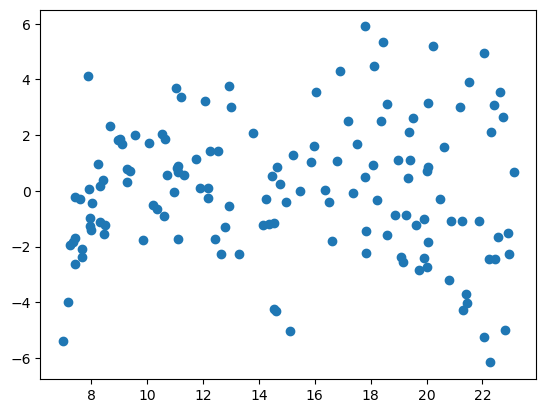

In [104]:
#check for residual values

plt.scatter(y_pred, y_train - y_pred)
plt.show()

In [105]:
#test data
y_test_pred = reg.predict(X_test)

In [106]:
#MSE, MAE, RMSE, R2

print("Mean squared error =", metrics.mean_squared_error(y_test, y_test_pred))
print("Mean absolute error =", metrics.mean_absolute_error(y_test, y_test_pred))
print("Root mean squared error =", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("R2 score =", metrics.r2_score(y_test, y_test_pred))

Mean squared error = 2.6360765623280673
Mean absolute error = 1.2278183566589413
Root mean squared error = 1.6235998775338913
R2 score = 0.8655979373420271
